# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Data and Preprocessing
- Change Price(USD) to Price_USD
- Check Null and Drop Null
- Change Some Datatype for Regression
- Add New Address Code from Address Column (Address_c)

In [2]:
df=pd.read_csv("HousePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

#### Change Column Name

In [4]:
df=df.rename(columns={'Price(USD)':'Price_USD'})
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price_USD
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


#### Check Null

In [5]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
Price_USD     0
dtype: int64

In [6]:
df=df.dropna()
df.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Address      0
Price        0
Price_USD    0
dtype: int64

#### Check Datatype and Change Some Data
- change Datatype
- Change Boolian To int

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
Area         3456 non-null object
Room         3456 non-null int64
Parking      3456 non-null bool
Warehouse    3456 non-null bool
Elevator     3456 non-null bool
Address      3456 non-null object
Price        3456 non-null float64
Price_USD    3456 non-null float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


In [8]:
df.Parking = df.Parking.astype(int)
df.Warehouse = df.Warehouse.astype(int)
df.Elevator = df.Elevator.astype(int)
df.Area = df.Area.str.replace(',' , '').astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
Area         3456 non-null int64
Room         3456 non-null int64
Parking      3456 non-null int32
Warehouse    3456 non-null int32
Elevator     3456 non-null int32
Address      3456 non-null object
Price        3456 non-null float64
Price_USD    3456 non-null float64
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 202.5+ KB


#### Add Address code Column (Address_C)

In [9]:
print(df.groupby('Address').size())

Address
Abazar                            23
Abbasabad                          2
Absard                             6
Abuzar                             3
Afsarieh                           6
Ahang                              2
Air force                         10
Ajudaniye                          5
Alborz Complex                     1
Aliabad South                      1
Amir Bahador                       4
Amirabad                          14
Amirieh                           12
Andisheh                          83
Aqdasieh                          25
Araj                               9
Argentina                          2
Atabak                             3
Azadshahr                          5
Azarbaijan                        24
Azari                              1
Baghestan                          8
Bahar                              1
Baqershahr                         1
Beryanak                          25
Boloorsazi                         1
Central Janatabad             

In [10]:
df['Address'].value_counts().nlargest(10)

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Saadat Abad               129
Parand                    127
Shahr-e-Ziba              109
Southern Janatabad         93
Jeyhoon                    91
Name: Address, dtype: int64

In [11]:
df.groupby('Address').mean()['Price'].nlargest().reset_index()

,Address,Price
0,Gandhi,7.000000e+10
1,Lavasan,4.800000e+10
2,Mahmoudieh,3.346667e+10
3,Vanak,3.270000e+10
4,Elahieh,2.678635e+10


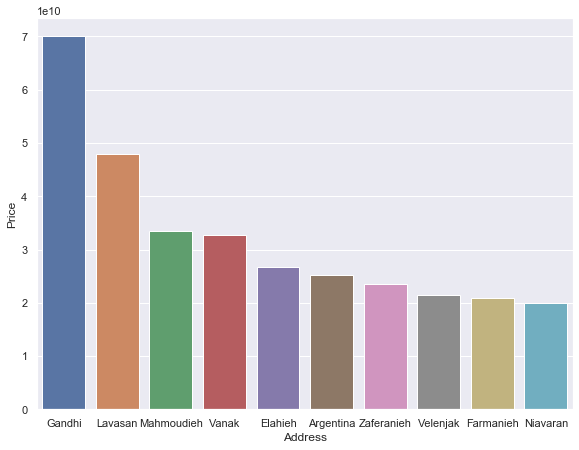

In [12]:
sns.set(rc={'figure.figsize':(9.6, 7.2)})
addressBar = df.groupby('Address').mean()['Price'].nlargest(10).reset_index()
sns.barplot(x="Address",y='Price',data=addressBar , errwidth=80)


In [13]:
df.groupby('Address').mean()['Price_USD'].nlargest(10).reset_index()

,Address,Price_USD
0,Gandhi,2.333333e+06
1,Lavasan,1.600000e+06
2,Mahmoudieh,1.115556e+06
3,Vanak,1.090000e+06
4,Elahieh,8.928784e+05
5,Argentina,8.388333e+05
6,Zaferanieh,7.858383e+05
7,Velenjak,7.127121e+05
8,Farmanieh,6.972427e+05
9,Niavaran,6.631069e+05


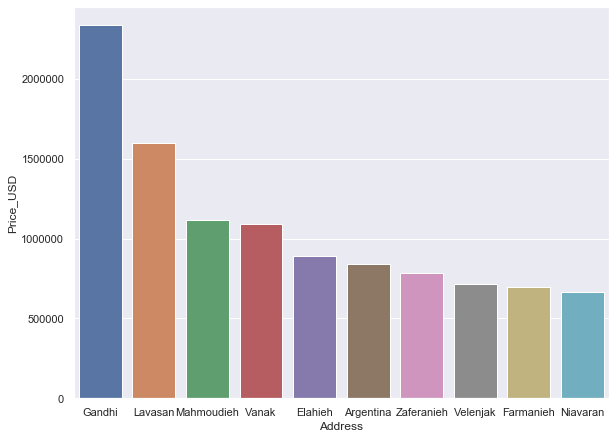

In [14]:
addressBar = df.groupby('Address').mean()['Price_USD'].nlargest(10).reset_index()
sns.barplot(x="Address",y='Price_USD',data=addressBar)

#### Create New Address_c Column
- Groupby Address with mean of Price
- Sorting By Price
- Add "Address_c" Column

In [15]:
#Length: 192, dtype: int64
Address_df = df.groupby('Address').mean()['Price_USD'].reset_index()
Address_df = Address_df.sort_values(by=['Price_USD']).reset_index()
Address_df.insert(0, 'codedAddress', range(0, 192))
df1 = pd.Series(Address_df.codedAddress.values,index=Address_df.Address).to_dict()
df["Address_c"] = df["Address"].map(df1)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price_USD,Address_c
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67,98
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67,98
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33,15
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,26
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,174


## Visualization

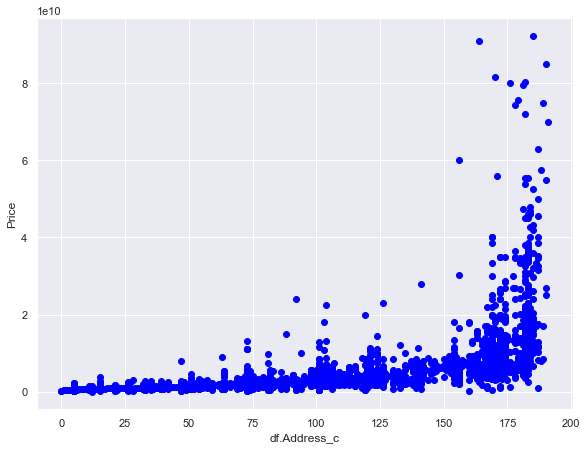

In [16]:
plt.scatter(df.Address_c, df.Price,  color='blue')
plt.xlabel("df.Address_c")
plt.ylabel("Price")
plt.show()

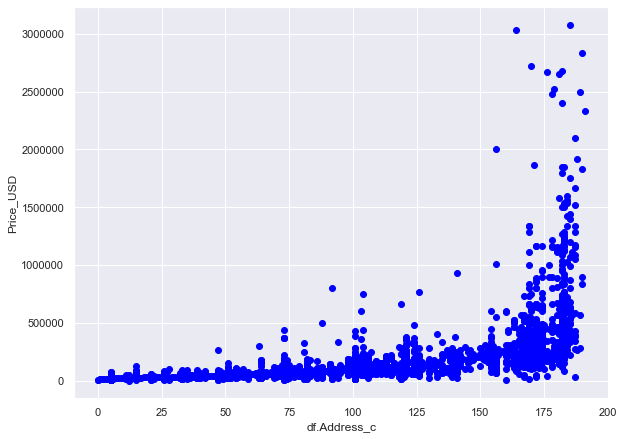

In [17]:
plt.scatter(df.Address_c, df.Price_USD,  color='blue')
plt.xlabel("df.Address_c")
plt.ylabel("Price_USD")
plt.show()

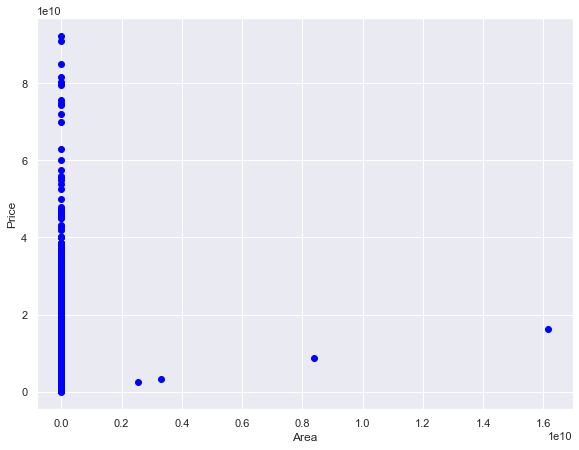

In [18]:
plt.scatter(df.Area, df.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

#### Drop Area Outlier

In [19]:
df.drop( df[df['Area'] >= 2000].index , inplace=True)

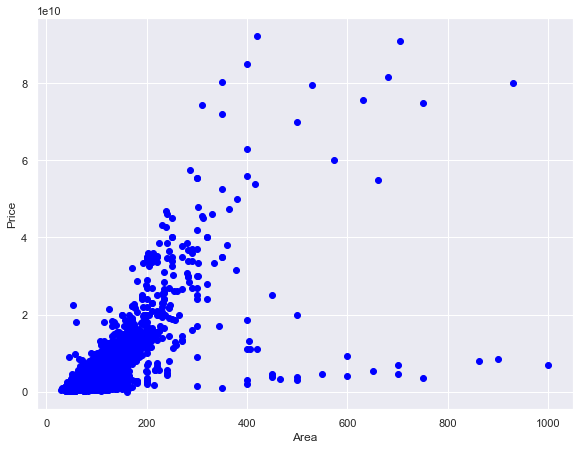

In [20]:
plt.scatter(df.Area, df.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

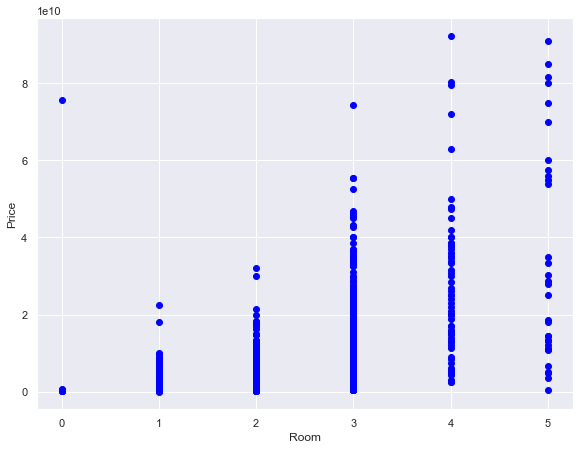

In [21]:
plt.scatter(df.Room, df.Price,  color='blue')
plt.xlabel("Room")
plt.ylabel("Price")
plt.show()

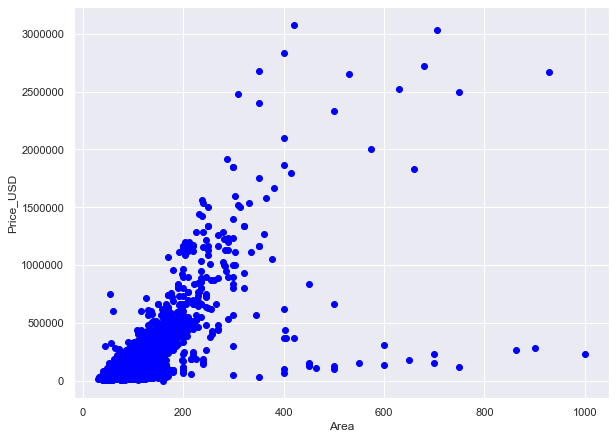

In [22]:
plt.scatter(df.Area, df.Price_USD,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price_USD")
plt.show()

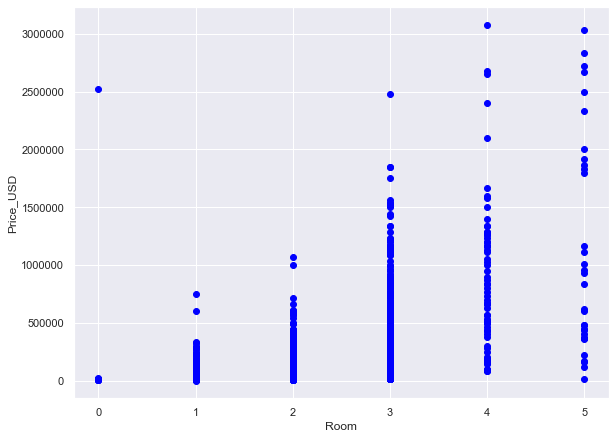

In [23]:
plt.scatter(df.Room, df.Price_USD,  color='blue')
plt.xlabel("Room")
plt.ylabel("Price_USD")
plt.show()

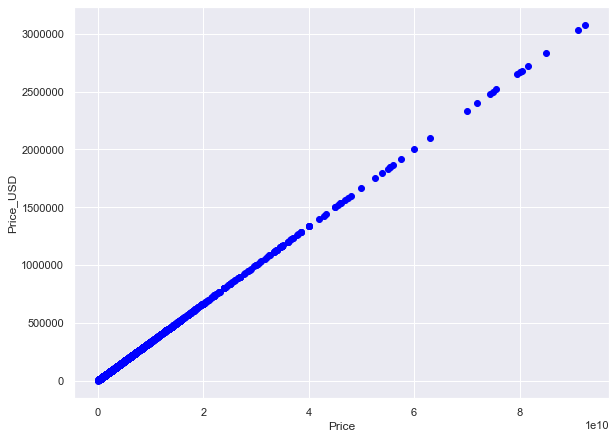

In [24]:
plt.scatter(df.Price, df.Price_USD,  color='blue')
plt.xlabel("Price")
plt.ylabel("Price_USD")
plt.show()

## Craate Test/Train Date And Visualization

In [25]:
#use Address instead of Address
cdf = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price','Price_USD', 'Address_c']]
cdf.head(9)

,Area,Room,Parking,Warehouse,Elevator,Price,Price_USD,Address_c
0,63,1,1,1,1,1.850000e+09,61666.67,98
1,60,1,1,1,1,1.850000e+09,61666.67,98
2,79,2,1,1,1,5.500000e+08,18333.33,15
3,95,2,1,1,1,9.025000e+08,30083.33,26
4,123,2,1,1,1,7.000000e+09,233333.33,174
5,70,2,1,1,0,2.050000e+09,68333.33,156
6,87,2,1,1,1,6.000000e+08,20000.00,15
7,59,1,1,1,1,2.150000e+09,71666.67,98
8,54,2,1,1,0,4.930000e+08,16433.33,73


In [26]:
msk1 = np.random.rand(len(df))
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
msk1

array([0.5940306 , 0.87799337, 0.42842274, ..., 0.80609286, 0.7519236 ,
       0.82505698])

#### Train data distribution(Area/Price_USD-Price)

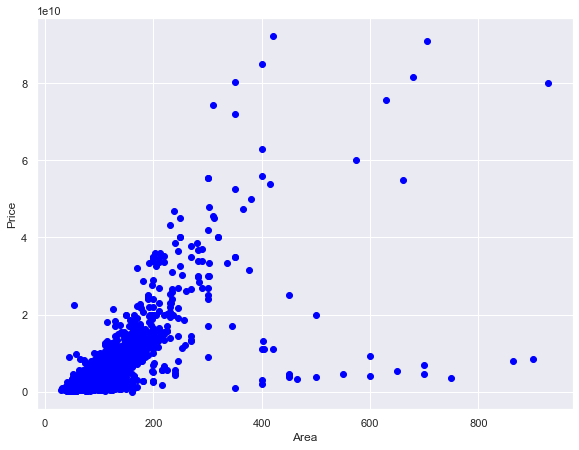

In [27]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

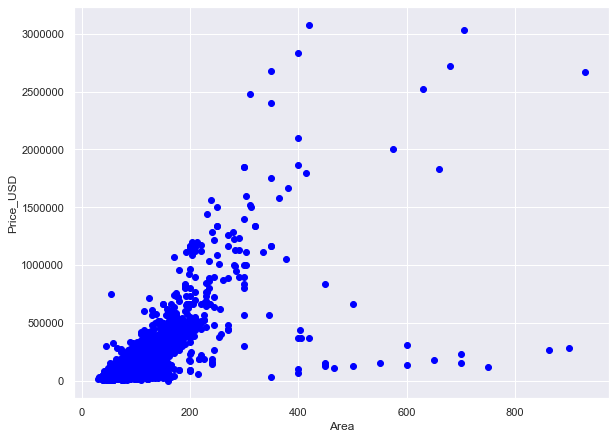

In [28]:
plt.scatter(train.Area, train.Price_USD,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price_USD")
plt.show()

#### Test data distribution(Area/Price_USD-Price)

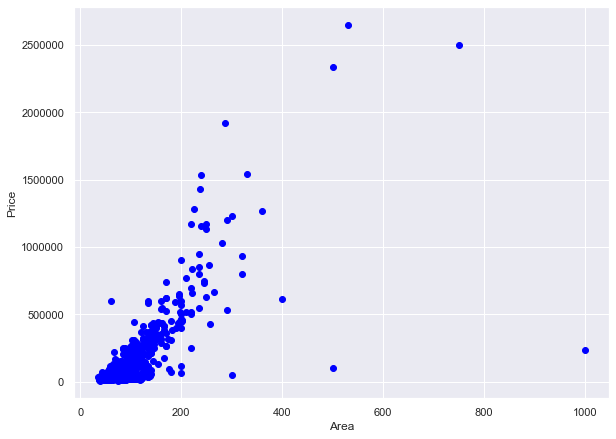

In [29]:
plt.scatter(test.Area, test.Price_USD,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

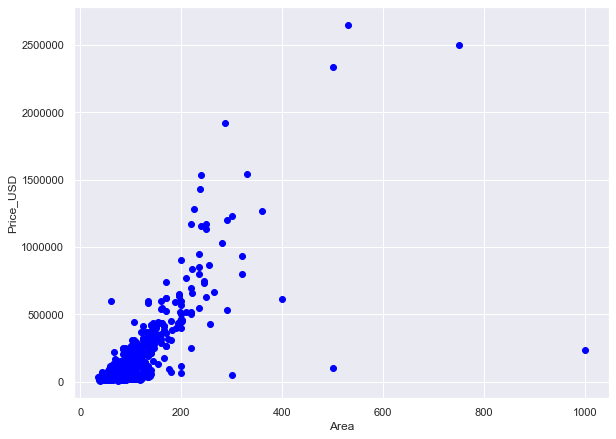

In [30]:
plt.scatter(test.Area, test.Price_USD,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price_USD")
plt.show()

# Multiple Regression Model

## 1.Predict Price

In [31]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x_train = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','Address_c']])
y_train = np.asanyarray(train[['Price']])
reg.fit(x_train, y_train)
# The coefficients
print ('Coefficients: ', reg.coef_)

Coefficients:  [[ 5.91593707e+07  1.02978740e+09 -1.64647803e+09  2.74662040e+08
   5.88976012e+08  5.15220768e+07]]


In [32]:
y_hat= reg.predict(test[['Area','Room','Parking','Warehouse','Elevator','Address_c']])
x_test = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','Address_c']])
y_test = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(x_test, y_test))

Residual sum of squares: 25041234688528125952.00
Variance score: 0.66


In [33]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_hat)
MSE = metrics.mean_squared_error(y_test, y_hat)
RMSE = np.sqrt(MSE)

In [34]:
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,2.316457e+09
MSE,2.504123e+19
RMSE,5.004122e+09


## 2.Predict Price_USD

In [35]:
regUSD = linear_model.LinearRegression()
x_trainUSD = np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','Address_c']])
y_trainUSD = np.asanyarray(train[['Price_USD']])
regUSD.fit(x_trainUSD, y_trainUSD)
# The coefficients
print ('Coefficients: ', regUSD.coef_)

Coefficients:  [[  1971.97902109  34326.2468119  -54882.60096963   9155.40105847
   19632.53384521   1717.40256043]]


In [36]:
y_hatUSD= regUSD.predict(test[['Area','Room','Parking','Warehouse','Elevator','Address_c']])
x_testUSD = np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','Address_c']])
y_testUSD = np.asanyarray(test[['Price_USD']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hatUSD - y_testUSD) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regUSD.score(x_testUSD, y_testUSD))

Residual sum of squares: 27823594121.04
Variance score: 0.66


In [37]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_testUSD, y_hatUSD)
MSE = metrics.mean_squared_error(y_testUSD, y_hatUSD)
RMSE = np.sqrt(MSE)

In [38]:
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,7.721523e+04
MSE,2.782359e+10
RMSE,1.668041e+05


# Create Train/Test data With Split data

In [39]:
from sklearn.model_selection import train_test_split
X=df[['Area','Room','Parking','Warehouse','Elevator','Address_c']]
y=df[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [40]:
X_train.shape , X_test.shape

((2415, 6), (1036, 6))

In [41]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
print ('Coefficients: ', model.coef_)

Coefficients:  [[ 5.97355116e+07  1.14938063e+09 -1.73266349e+09  1.06835949e+08
   5.83164294e+08  5.22088845e+07]]


In [42]:
y_hatmodel= model.predict(X_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hatmodel - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))

Residual sum of squares: 22185673355068948480.00
Variance score: 0.62


# Maktabkhone Regresion Project
- Author: Saeed Bagheri
- Github:  https://github.com/Saeedb7203